In [1]:
import numpy as np
import networkx as nx
import time
import matplotlib.pyplot as plt
import re
import random as ra
import pandas as pd
import itertools
import time
import sys
import ast

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [2]:
path = '/content/drive/MyDrive/Colab Work/Computational Convex Optimization/files/graph-to-color.txt'

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

# function that computes the Euclidean distance between two points in R^2

def compute_distance (x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**(.5)

# function that computes the manhattan distance between two points in R^2

def compute_manhattan_distance (x1,y1,x2,y2):
    return (abs(x1-x2)+abs(y1-y2))

#Exercise 1

In [ ]:
# function that creates a random Steiner tree instance over a complete graph with euclidean distances. It can be adapted to other distance functions
# Input: k = number of terminals; s = number of Steiner nodes; should_print=0/1 (1 to plot a picture of the instance, 0 otherwise)
# Output: G_terminal = graph in NetworkX format containing Terminal nodes, pos_terminal= coordinates of the terminals, pos_steiner = coordinates of the steiner nodes
# Output (cont): 

def twod_steiner_instance(k,s,should_print):
    
    G_terminal=nx.Graph() # we create a first graph that will contain the terminals
    pos_terminal={} # here we store the position of the terminals

    # Generates nodes as random points in the unit square
    
    for i in range(0,k):
        x_coordinate=np.random.random_sample()
        y_coordinate=np.random.random_sample()
        G_terminal.add_node(i,x=x_coordinate,y=y_coordinate) # each node has attributes (given as dictionaries) that represents its coordinates
        pos_terminal[i]=(x_coordinate,y_coordinate)     # additional storing of coordinates for drawing

    lab_terminal=range(k) # assign labels from 0 to k to terminals
        
    G_Steiner=nx.Graph() # we create a second graph containing the Steiner nodes
    pos_Steiner={} # here we store the position of the terminals
    
    print(pos_terminal)
    
    for i in range(0,s):
        x_coordinate=np.random.random_sample()
        y_coordinate=np.random.random_sample()
        G_Steiner.add_node(i,x=x_coordinate,y=y_coordinate) # each node has attributes given as dictionaries
        pos_Steiner[i]=(x_coordinate,y_coordinate)     # coordinates for drawing
        
# if should_print=1, we plot the graph

    if should_print == 1:
        print("Here is the graph with %d Terminals (in blue) and %d Steiner nodes (in red) we sampled" % (k,s))
         
        nx.draw_networkx_nodes(G_terminal,pos_terminal,node_color='b',node_size=180) # prints nodes of the graph G_terminal, i.e. terminals

        nx.draw_networkx_nodes(G_Steiner,pos_Steiner,node_color='r',node_size=180)  # prints Steiner nodes        
        plt.show()
    
# assigning euclidean distances as weights of edges in G_terminal

    for i in range(0,k):
        for j in range(i+1,k):
            G_terminal.add_edge(i,j, weight=compute_distance(G_terminal.nodes[i]['x'],G_terminal.nodes[i]['y'],G_terminal.nodes[j]['x'],G_terminal.nodes[j]['y'])) # add the attribute weight to each edge, given by the euclidean distance
  
    return (G_terminal,pos_terminal,pos_Steiner)

## function that adds one (Steiner) node to the graph
## Input: G= current graph; pos=position of nodes of G, x_coordinate= x-coordinate of the node to add; y_coordinate: y-coordinate of the node to add; lab = label of the node to add
## Output: G = new graph; pos= new vector of positions    
    
def enlarge_graph (G,pos,x_coordinate,y_coordinate):
    
    n=nx.number_of_nodes(G)
    G1=G.copy()
    G1.add_node(n,x=x_coordinate,y=y_coordinate)
    pos[n]=(x_coordinate,y_coordinate)
    
# we add edges between all nodes and the new node
    
    for i in range(0,n):
            G1.add_edge(i,n, weight=compute_distance(G1.nodes[i]['x'],G1.nodes[i]['y'],G1.nodes[n]['x'],G1.nodes[n]['y'])) # add the attribute weight to each edge, given by the euclidean distance
            
    return (G1,pos)


{0: (0.0922830822652343, 0.3656520909817351), 1: (0.9506786528397854, 0.1592746827370175), 2: (0.6607184018980531, 0.9921061797040253), 3: (0.6273040665910143, 0.7951419615015461), 4: (0.5699912501899543, 0.031985981664672036)}
Here is the graph with 5 Terminals (in blue) and 20 Steiner nodes (in red) we sampled


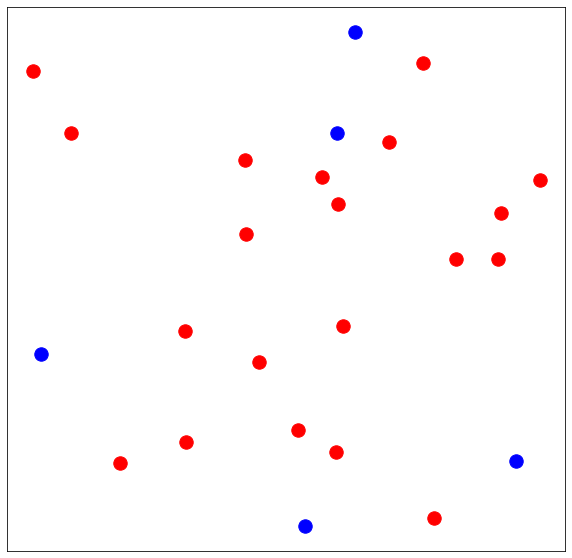

In [ ]:
## Setting up the parameters

k = 5 # number of Terminals
s = 20 # number of Steiner nodes

# Creating the graph

(G_terminal,pos,pos_Steiner)=twod_steiner_instance(k,s,1)



This is the initial solution - i.e. the spanning tree on the terminals - and it has weight 1.869964




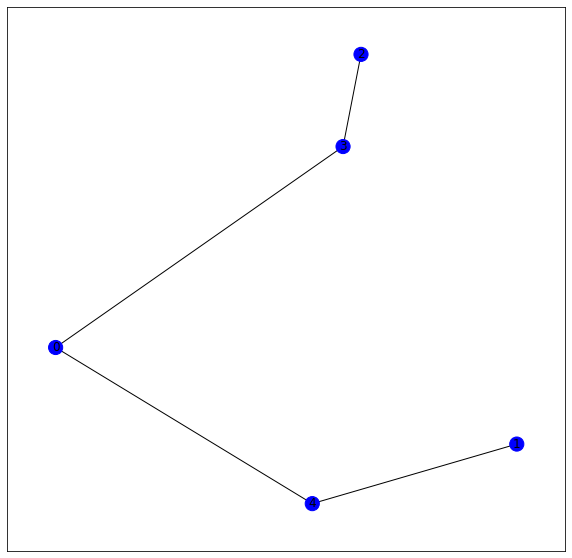



The current best solution has weight 1.869964, while the best candidate obtained at this iteration has cost 1.774501


We have found a better solution! The algorithm goes on
Here is the current best solution




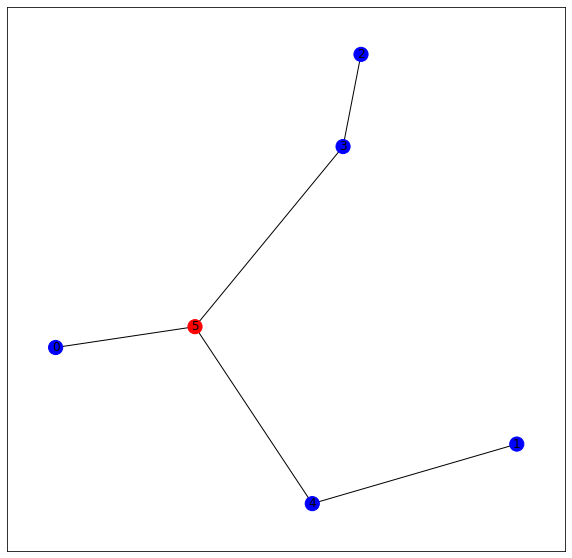



The current best solution has weight 1.774501, while the best candidate obtained at this iteration has cost 1.791317


We could not improve our solution. This is the best tree found, and it has weight 1.774501



In [ ]:
# Step 1 of the algorithm: the original solution is the MST over G[R]

T=nx.minimum_spanning_tree(G_terminal,'weight') # current best is the Spanning tree given by terminal nodes
color = ['b'] * k

# Recording the data of current best solution

best_weight=nx.Graph.size(T,'weight') # weight of the best graph found so far
G_best=G_terminal  # best collection of nodes found so far

# Drawing the initial solution 

print("")
print("")
print("This is the initial solution - i.e. the spanning tree on the terminals - and it has weight %f" % best_weight)
print("")
print("")

# nx.draw_networkx_labels(T,pos,node_size=100)
nx.draw_networkx(T,pos,node_size=200,node_color=color)
plt.show()

found_better=1 # set to 1 if we improved wrt the previous best solution, 0 otherwise
added_Steiner=[] # list of Steiner nodes that have been added to the current solution

while found_better == 1: # while we improve the solution at the current iteration
    
    temp_weight=2*(s+k) # cost of the best "new solution" found so far - at the beginning is a very big number 
    color.append('r') # all new nodes are Steiner, so we give them color blue
    steiner_to_add=-1 # which is the Steiner node that decreases the weight the most - at the beginning no-one
    
    for i in range(s):
        if not (i in added_Steiner): # if node i has not been added yet to the list of Steiner nodes
            
            # Computes the MST of the graph with the new node added          
            
            (G,pos1)=enlarge_graph(G_best,pos,pos_Steiner[i][0],pos_Steiner[i][1])
            T1=nx.minimum_spanning_tree(G,'weight')
            candidate_weight=nx.Graph.size(T1,'weight')

# Uncomment this if you want all spanning trees that are evaluated to be printed
#
#            print("Here is a tree with cost %f" % candidate_weight)
#            nx.draw_networkx_labels(T1,pos,node_size=100)
#            nx.draw_networkx(T1,pos,node_size=200,node_color=color)
#            plt.show()
            
            # Compares the weight of the current candidate solution  with the weight of the best candidate solution obtained in this iteration of the "while", and records the best
            
            if candidate_weight < temp_weight:
                temp_weight=candidate_weight
                steiner_to_add=i
                        
# Once that all Steiner nodes have been added, it compares the best candidate solution with the best solution obtained so far
# If it is better, it updates the solution and continues. Else, it stops
    
    print("")
    print("")
    print("The current best solution has weight %f, while the best candidate obtained at this iteration has cost %f" % (best_weight,temp_weight))
    print("")
    print("")

    if temp_weight < best_weight:
        
        print("We have found a better solution! The algorithm goes on")
        print("Here is the current best solution")
        print("")
        print("")
        
        # if we found a better solution, we update the graph G_best where the best current solution is found
        (G_best_1,pos)=enlarge_graph(G_best,pos,pos_Steiner[steiner_to_add][0],pos_Steiner[steiner_to_add][1])
        
        # and we print the best solution found so far
        
        T=nx.minimum_spanning_tree(G_best_1,'weight')
        nx.draw_networkx(T,pos,node_size=200,node_color=color)
        plt.show()
        
        best_weight=temp_weight # updates the weight of the best solution
        added_Steiner.append(steiner_to_add) # updates the list of Steiner nodes we used
    
    else:
        print("We could not improve our solution. This is the best tree found, and it has weight %f" % best_weight)
        print("")
        
        # if we could not improve our current solution, we exit the "while" cycle and stop
        
        found_better=0




This is the initial solution - i.e. the spanning tree on the terminals - and it has weight 1.869964




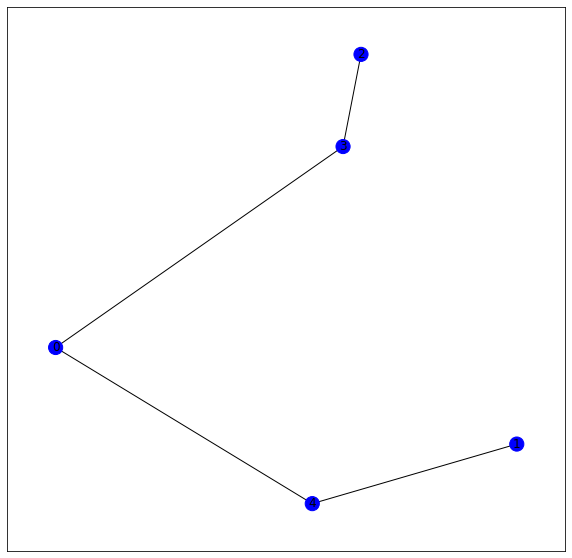



The current best solution has weight 1.869964, while the best candidate obtained at this iteration has cost 1.763669


We have found a better solution! The algorithm goes on
Here is the current best solution




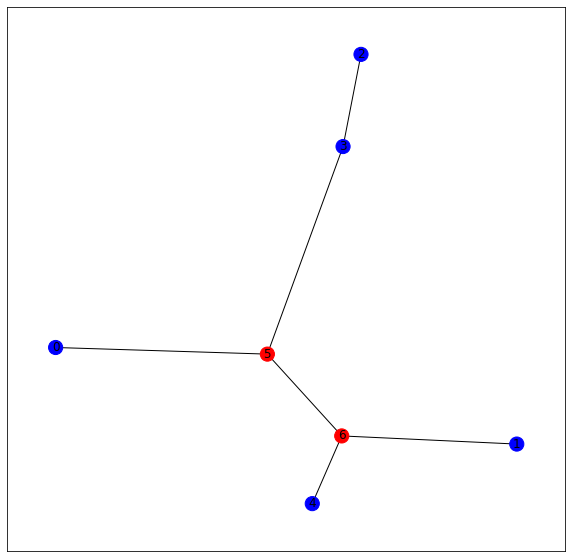

In [ ]:
# Step 1 of the algorithm: the original solution is the MST over G[R]

T=nx.minimum_spanning_tree(G_terminal,'weight') # current best is the Spanning tree given by terminal nodes
color = ['b'] * k

# Recording the data of current best solution

best_weight=nx.Graph.size(T,'weight') # weight of the best graph found so far
G_best=G_terminal  # best collection of nodes found so far

# Drawing the initial solution 

print("")
print("")
print("This is the initial solution - i.e. the spanning tree on the terminals - and it has weight %f" % best_weight)
print("")
print("")

# nx.draw_networkx_labels(T,pos,node_size=100)
nx.draw_networkx(T,pos,node_size=200,node_color=color)
plt.show()

# set to 1 if we improved wrt the previous best solution, 0 otherwise
added_Steiner=[] # list of Steiner nodes that have been added to the current solution

combinations  =  list(set(itertools.combinations(pos_Steiner, (2))))


temp_weight=2*(s+k) # cost of the best "new solution" found so far - at the beginning is a very big number 
#color.append('r') # all new nodes are Steiner, so we give them color blue
steiner_to_add=-1 # which is the Steiner node that decreases the weight the most - at the beginning no-one
        

for comb in combinations:
     
    (G,pos1)=enlarge_graph(G_best,pos,pos_Steiner[comb[0]][0],pos_Steiner[comb[0]][1])
    (G,pos1)=enlarge_graph(G, pos1,pos_Steiner[comb[1]][0],pos_Steiner[comb[1]][1])
    T1=nx.minimum_spanning_tree(G,'weight')
    candidate_weight=nx.Graph.size(T1,'weight')

# Uncomment this if you want all spanning trees that are evaluated to be printed
#
#            print("Here is a tree with cost %f" % candidate_weight)
#            nx.draw_networkx_labels(T1,pos,node_size=100)
#            nx.draw_networkx(T1,pos,node_size=200,node_color=color)
#            plt.show()
            
            # Compares the weight of the current candidate solution  with the weight of the best candidate solution obtained in this iteration of the "while", and records the best
            
    if candidate_weight < temp_weight:
      temp_weight=candidate_weight
      steiner_to_add=comb
                        
# Once that all Steiner nodes have been added, it compares the best candidate solution with the best solution obtained so far
# If it is better, it updates the solution and continues. Else, it stops
    
print("")
print("")
print("The current best solution has weight %f, while the best candidate obtained at this iteration has cost %f" % (best_weight,temp_weight))
print("")
print("")

if temp_weight < best_weight:
  print("We have found a better solution! The algorithm goes on")
  print("Here is the current best solution")
  print("")
  print("")
        
        # if we found a better solution, we update the graph G_best where the best current solution is found
  (G_best,pos)=enlarge_graph(G_best,pos,pos_Steiner[steiner_to_add[0]][0],pos_Steiner[steiner_to_add[0]][1])
  (G_best,pos)=enlarge_graph(G_best,pos,pos_Steiner[steiner_to_add[1]][0],pos_Steiner[steiner_to_add[1]][1])
        
        # and we print the best solution found so far
        
  T=nx.minimum_spanning_tree(G_best,'weight')
  color.append('r') # all new nodes are Steiner, so we give them color blue
  color.append('r') # all new nodes are Steiner, so we give them color blue
  nx.draw_networkx(T,pos,node_size=200,node_color=color)
  plt.show()
        
  best_weight=temp_weight # updates the weight of the best solution
  added_Steiner.append(steiner_to_add) # updates the list of Steiner nodes we used
    
else:
  print("We could not improve our solution. This is the best tree found, and it has weight %f" % best_weight)
  print("")
        
        # if we could not improve our current solution, we exit the "while" cycle and stop



This is the initial solution - i.e. the spanning tree on the terminals - and it has weight 1.869964




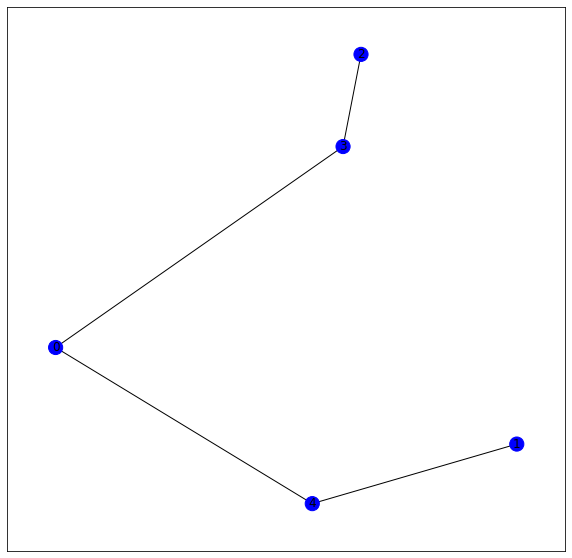



The current best solution has weight 1.869964, while the best candidate obtained at this iteration has cost 1.763671


We have found a better solution! The algorithm goes on
Here is the current best solution




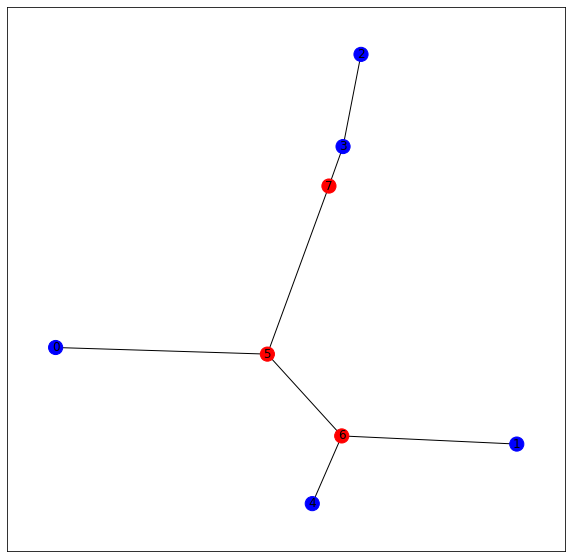

In [ ]:
# Step 1 of the algorithm: the original solution is the MST over G[R]

T=nx.minimum_spanning_tree(G_terminal,'weight') # current best is the Spanning tree given by terminal nodes
color = ['b'] * k

# Recording the data of current best solution

best_weight=nx.Graph.size(T,'weight') # weight of the best graph found so far
G_best=G_terminal  # best collection of nodes found so far

# Drawing the initial solution 

print("")
print("")
print("This is the initial solution - i.e. the spanning tree on the terminals - and it has weight %f" % best_weight)
print("")
print("")

# nx.draw_networkx_labels(T,pos,node_size=100)
nx.draw_networkx(T,pos,node_size=200,node_color=color)
plt.show()

# set to 1 if we improved wrt the previous best solution, 0 otherwise
added_Steiner=[] # list of Steiner nodes that have been added to the current solution

combinations  =  list(set(itertools.combinations(pos_Steiner, (3))))


temp_weight=2*(s+k) # cost of the best "new solution" found so far - at the beginning is a very big number 
#color.append('r') # all new nodes are Steiner, so we give them color blue
steiner_to_add=-1 # which is the Steiner node that decreases the weight the most - at the beginning no-one
        

for comb in combinations:
     
    (G,pos1)=enlarge_graph(G_best,pos,pos_Steiner[comb[0]][0],pos_Steiner[comb[0]][1])
    (G,pos1)=enlarge_graph(G, pos1,pos_Steiner[comb[1]][0],pos_Steiner[comb[1]][1])
    (G,pos1)=enlarge_graph(G, pos1,pos_Steiner[comb[2]][0],pos_Steiner[comb[2]][1])
    T1=nx.minimum_spanning_tree(G,'weight')
    candidate_weight=nx.Graph.size(T1,'weight')

# Uncomment this if you want all spanning trees that are evaluated to be printed
#
#            print("Here is a tree with cost %f" % candidate_weight)
#            nx.draw_networkx_labels(T1,pos,node_size=100)
#            nx.draw_networkx(T1,pos,node_size=200,node_color=color)
#            plt.show()
            
            # Compares the weight of the current candidate solution  with the weight of the best candidate solution obtained in this iteration of the "while", and records the best
            
    if candidate_weight < temp_weight:
      temp_weight=candidate_weight
      steiner_to_add=comb
                        
# Once that all Steiner nodes have been added, it compares the best candidate solution with the best solution obtained so far
# If it is better, it updates the solution and continues. Else, it stops
    
print("")
print("")
print("The current best solution has weight %f, while the best candidate obtained at this iteration has cost %f" % (best_weight,temp_weight))
print("")
print("")

if temp_weight < best_weight:
  print("We have found a better solution! The algorithm goes on")
  print("Here is the current best solution")
  print("")
  print("")
        
        # if we found a better solution, we update the graph G_best where the best current solution is found
  (G_best,pos)=enlarge_graph(G_best,pos,pos_Steiner[steiner_to_add[0]][0],pos_Steiner[steiner_to_add[0]][1])
  (G_best,pos)=enlarge_graph(G_best,pos,pos_Steiner[steiner_to_add[1]][0],pos_Steiner[steiner_to_add[1]][1])
  (G_best,pos)=enlarge_graph(G_best,pos,pos_Steiner[steiner_to_add[2]][0],pos_Steiner[steiner_to_add[2]][1])
        
        # and we print the best solution found so far
        
  T=nx.minimum_spanning_tree(G_best,'weight')
  color.append('r') # all new nodes are Steiner, so we give them color blue
  color.append('r') # all new nodes are Steiner, so we give them color blue
  color.append('r') # all new nodes are Steiner, so we give them color blue
  nx.draw_networkx(T,pos,node_size=200,node_color=color)
  plt.show()
        
  best_weight=temp_weight # updates the weight of the best solution
  added_Steiner.append(steiner_to_add) # updates the list of Steiner nodes we used
    
else:
  print("We could not improve our solution. This is the best tree found, and it has weight %f" % best_weight)
  print("")
        
        # if we could not improve our current solution, we exit the "while" cycle and stop

#Exercise 2

In [ ]:
def random_instance_cgraph(n, should_print, node_size):
  g = nx.Graph()
  n = n
  # we create an empty dictionary pos. for each node i, pos[i] is a 2-dim array denoting the position of the point in the plane

  g.pos={}

  for i in range(n):
      x=np.random.random_sample() # randomly sample from [0,1)
      y=np.random.random_sample()
      g.add_node(i)#,x=x,y=y)
      g.pos[i]=(x,y)     # coordinates for drawing
        
  for i in range(n-1):
    for j in range(i+1,n):
      g.add_edge(i,j, weight = compute_distance(g.pos[i][0], g.pos[i][1],g.pos[j][0], g.pos[j][1]))

  if should_print == 1:
    print("")
    print("Here is the initial graph with %i nodes:" % (n))

    nx.draw_networkx(g,pos=g.pos,node_size=node_size)
    plt.show()

  return g

In [ ]:
### Function implementing the Greedy algorithm for TSP 
### Prints the tour it finds, and its picture
### Input: G= Graph (in networkX format); pos=2-dimensional coordinates of the input; should_print=0/1 (1 to plot a picture of the tour found, 0 otherwise)
### Output: none

def run_greedy_TSP(G,pos,should_print):   

    start_time=time.time()
    
    n=nx.number_of_nodes(G)
    tour=[0]
    nr_cities=0
    length_tour=0


    while nr_cities<n-1:
        min_weight=999999
        candidate=-1
        for i in range(n):
            if (i not in tour):
                if G.edges[tour[nr_cities],i]['weight'] < min_weight:
                    min_weight=G.edges[tour[nr_cities],i]['weight']
                    candidate=i
        tour.append(candidate)
        nr_cities=nr_cities+1
        length_tour=length_tour+min_weight

    length_tour=length_tour+G.edges[0,tour[n-1]]['weight']

    final_time=time.time() - start_time


    # if should_print=1, we plot the tour
    if should_print == 1:
        print(" **** Greedy Algorithm ***")
        print("")
        print("")
        G_final=nx.Graph()
        for i in range(n-1):
          G_final.add_edge(tour[i],tour[i+1])
          G_final.add_edge(tour[0],tour[n-1])
        
        nx.draw_networkx_labels(G_final,pos)
        nx.draw_networkx(G_final,pos,node_size=200)
        plt.show()
        
        print("The greedy tour is %s and its total length is %f" % (tour,length_tour))
        print("Running time of the greedy algorithm: %s seconds" % final_time) 
        print("")

    return tour, length_tour, final_time

In [ ]:
def run_2opt_tsp(G, pos, tour, lenght, should_print): 

  n = len(tour)

  new_lenght = lenght
  candidate_lenght = lenght
  new_tour = tour[:]

  start_time=time.time()

  improvement = True

  while improvement:
    for i in range(1,n-1):
      for j in range(i+1, n-1):
        if new_lenght + G.edges[tour[i-1],tour[j]]['weight'] + G.edges[tour[i],tour[j+1]]['weight']-G.edges[tour[i-1],tour[i]]['weight'] - G.edges[tour[j],tour[j+1]]['weight'] < candidate_lenght:
          candidate_lenght = new_lenght + G.edges[tour[i-1],tour[j]]['weight'] + G.edges[tour[i],tour[j+1]]['weight']-G.edges[tour[i-1],tour[i]]['weight'] - G.edges[tour[j],tour[j+1]]['weight']
          candidate_tour = new_tour[:i-1]+new_tour[i:j][::-1]+new_tour[j+1:]
    if new_lenght + G.edges[tour[0],tour[j+1]]['weight'] - G.edges[tour[j],tour[j+1]]['weight'] < candidate_lenght:
      candidate_lenght = new_lenght + G.edges[tour[0],tour[j+1]]['weight'] - G.edges[tour[j],tour[j+1]]['weight']
      candidate_tour = new_tour[:j][::-1] + new_tour[j+1:]
    if new_lenght + G.edges[tour[i-1],tour[n-1]]['weight'] - G.edges[tour[i-1],tour[i]]['weight'] < candidate_lenght:
      candidate_lenght = new_lenght + G.edges[tour[i-1],tour[n-1]]['weight'] - G.edges[tour[i-1],tour[i]]['weight']
      candidate_tour = new_tour[:i-1] + new_tour[i:][::-1]

    if candidate_lenght < new_lenght:
      new_lenght = candidate_lenght
      new_tour = candidate_tour[:]
    else: 
      improvement = False

    final_time=time.time() - start_time  

    # if should_print=1, we plot the tour
    if should_print == 1:
      print(" **** 2-OPT Algorithm ***")
      print("")
      print("")
      G_final=nx.Graph()
      for i in range(n-1):
        G_final.add_edge(new_tour[i],new_tour[i+1])
        G_final.add_edge(new_tour[0],new_tour[n-1])
      
      nx.draw_networkx_labels(G_final,pos)
      nx.draw_networkx(G_final,pos,node_size=200)
      plt.show()
          
      print("The 2-opt tour is %s and its total length is %f" % (new_tour,new_lenght))
      print("Running time of the 2-OPT algorithm: %s seconds" % final_time) 
      print("")

    return new_tour, new_lenght, final_time



In [ ]:
lenght_30 = []
time_30 = []
lenght_30_2 = []
time_30_2 = []
lenght_40 = []
time_40 = []
lenght_40_2 = []
time_40_2 = []
lenght_50 = []
time_50 = []
lenght_50_2 = []
time_50_2 = []

for i in range(20):
  g = random_instance_cgraph(30, 0, 400)
  tour, lenght, t = run_greedy_TSP(g, g.pos, 0)
  lenght_30.append(lenght)
  time_30.append(t)
  tour_2, lenght_2, t_2 = run_2opt_tsp(g, g.pos, tour, lenght, 0)
  lenght_30_2.append(lenght_2)
  time_30_2.append(t_2)
 
  g = random_instance_cgraph(40, 0, 400)
  tour, lenght, t = run_greedy_TSP(g, g.pos, 0)
  lenght_40.append(lenght)
  time_40.append(t)
  tour_2, lenght_2, t_2 = run_2opt_tsp(g, g.pos, tour, lenght, 0)
  lenght_40_2.append(lenght_2)
  time_40_2.append(t_2)
 
  g = random_instance_cgraph(50, 0, 400)
  tour, lenght, t = run_greedy_TSP(g, g.pos, 0)
  lenght_50.append(lenght)
  time_50.append(t)
  tour_2, lenght_2, t_2 = run_2opt_tsp(g, g.pos, tour, lenght, 0)
  lenght_50_2.append(lenght_2)
  time_50_2.append(t_2)

improve_30 = []
improve_40 = []
improve_50 = []

zip_lenght = zip(lenght_30, lenght_30_2)
for lenght1, lenght2 in zip_lenght: 
  improve_30.append(lenght2 / lenght1 * 100 - 100)

zip_lenght = zip(lenght_40, lenght_40_2)
for lenght1, lenght2 in zip_lenght: 
  improve_40.append(lenght2 / lenght1 * 100 - 100)

zip_lenght = zip(lenght_50, lenght_50_2)
for lenght1, lenght2 in zip_lenght: 
  improve_50.append(lenght2 / lenght1 * 100 - 100)

column_names = ["Greedy_30", "2-OPT_30", "%Improve", "Greedy_40", "2-OPT_40", "%Improve", "Greedy_50", "2-OPT_50", "%Improve"]
results = pd.DataFrame(list(zip(lenght_30,lenght_30_2, improve_30,lenght_40,lenght_40_2, improve_40, lenght_50,lenght_50_2, improve_50)), columns =column_names)

In [ ]:
print(results.to_latex(index=False))

\begin{tabular}{rrrrrrrrr}
\toprule
 Greedy\_30 &  2-OPT\_30 &  \%Improve &  Greedy\_40 &  2-OPT\_40 &  \%Improve &  Greedy\_50 &  2-OPT\_50 &  \%Improve \\
\midrule
  5.134367 &  4.796867 & -6.573356 &   6.554373 &  6.408500 & -2.225587 &   6.308120 &  6.061886 & -3.903434 \\
  5.604680 &  5.255662 & -6.227274 &   5.836829 &  5.801009 & -0.613696 &   7.045294 &  6.853359 & -2.724301 \\
  5.617815 &  5.449625 & -2.993864 &   5.660638 &  5.200016 & -8.137269 &   7.762440 &  7.512250 & -3.223082 \\
  5.580482 &  5.237325 & -6.149222 &   6.369357 &  5.959685 & -6.431912 &   7.312671 &  6.979958 & -4.549815 \\
  5.102545 &  4.980130 & -2.399101 &   6.102156 &  5.913784 & -3.086960 &   6.446338 &  6.258372 & -2.915860 \\
  5.059424 &  4.891802 & -3.313073 &   7.339963 &  7.016813 & -4.402605 &   7.985355 &  7.773088 & -2.658212 \\
  5.987779 &  5.844947 & -2.385400 &   5.531177 &  5.349922 & -3.276966 &   7.224771 &  6.917268 & -4.256224 \\
  5.469689 &  5.087171 & -6.993415 &   6.800626 & 

#Exercise 3

In [4]:
# input any undirected graph G (nodes labeled 0,1,...,n-1)

def graph_coloring_local(G, seed, nr_examples=3):
    
    # initialize all nodes a different color
    n = G.number_of_nodes()
    # dictionary (key: node, value:color)
    coloring = {}
    color_dict = {}
    for i in range(n):
        color_dict[i] = '#%06X' % ra.randint(0, 0xFFFFFF)
    for i in range(0,n):
        coloring[i] = color_dict[i]
    
    # assign random coordinates to nodes in G for printing
    np.random.seed(seed)
    pos={}
    lab=[]
    for i in range(0,n):
        x=np.random.random_sample()
        y=np.random.random_sample()
        pos[i]=(x,y)  # coordinates for drawing
        lab.append(i)  # label for drawing
    
    # draw a uncolored graph
    print("To find a way of coloring the nodes of a graph such that no two adjacent nodes are of the same color: ")
    nx.draw_networkx(G, pos=pos, node_color='white', edgecolors="black", with_labels=True, font_color='black')
    plt.axis("off")
    plt.show()
    
    print("randomly color the graph: ")
    values = [coloring.get(node, 0.25) for node in G.nodes()]
    nx.draw_networkx(G, pos=pos, node_color=values, with_labels=True, font_color='white')
    plt.axis("off")
    plt.show()

    local_opt = 0
    nr_ex = 0
    while local_opt == 0:  # when not at a local optimum
        colors = list(coloring.values())
        nr_colors = len(set(colors))
        to_break = 0
        for c in colors:
            for j in colors:
                if list(color_dict.values()).index(j) > list(color_dict.values()).index(c):  # avoid repeated trial
                    
                    subgraph_nodes_c = []
                    subgraph_nodes_j = []
                    for node in coloring.keys():
                        # all nodes colored c
                        if coloring[node] == c:
                            subgraph_nodes_c.append(node)
                        # all nodes colored j
                        elif coloring[node] == j:
                            subgraph_nodes_j.append(node)
                    
                    # form a subgraph with those 2 colors
                    G1 = nx.Graph()
                    G1 = G.subgraph(subgraph_nodes_c + subgraph_nodes_j)
                    
                    # no connected components (i.e. no edges), change color of j to c
                    if G1.number_of_edges() == 0:
                        for k in subgraph_nodes_j:
                            coloring[k] = c
                            
                        # print when a color is eliminated
                        #print(f"nodes with color '{j}' are colored by '{c}': ")
                        #print(f"the number of colors: {nr_colors} -> {len(set(coloring.values()))}")
                        values = [coloring.get(node, 0.25) for node in G.nodes()]
                        #nx.draw_networkx(G, pos=pos, node_color=values, with_labels=True, font_color='white')
                        #plt.axis("off")
                        #plt.show()
                        
                        to_break = 1  # improvement found, update coloring and find new pair of colorings to swap
                    
                    else:
                        # set of nodes for each connected components
                        comps = list(nx.connected_components(G1))

                        # initial function value -(|c|^2+|j|^2)
                        c_size = len(subgraph_nodes_c)
                        j_size = len(subgraph_nodes_j)
                        v_inti = -(c_size**2 + j_size**2)
                        
                        for l in comps: # try to decrease function value
                            l = list(l)
                            c_swap = list(set(subgraph_nodes_c) & set(l))
                            j_swap = list(set(subgraph_nodes_j) & set(l))
                            v_change = -((c_size + len(j_swap) - len(c_swap))**2 + (j_size + len(c_swap) - len(j_swap))**2)
                            
                            if nr_colors == 4 and nr_ex < nr_examples:
                                values = [coloring.get(node, 0.25) for node in l]
                                #nx.draw_networkx(G1, nodelist=l, pos=pos, node_color=values)
                                #plt.axis("off")
                                # plt.savefig(f'local-search-graph-coloring-{nr_ex}.jpg')
                                #plt.show()
                                nr_ex = nr_ex + 1
                            
                            if v_change < v_inti:
                                
                                for k in c_swap:
                                    coloring[k] = j
                                for k in j_swap:
                                    coloring[k] = c
                                to_break = 1  # improvement found, update coloring and find new pair of colorings to swap
                                break
                    
                    # if "to_break" = 1, then break the double loop
                    if to_break == 1:
                        break
            if to_break == 1:
                break

        if to_break == 0:  # at end of for loop no swaps happen
            local_opt = 1  # if ever all pairs of colors checked without breaking, local minimum; stop algorithm
            
            
    values = [coloring.get(node, 0.25) for node in G.nodes()]
    
    print("the feasible coloring is:")
    print(coloring)
    
    num = len(set(coloring.values()))
    print("number of colors used =", num)
    nx.draw_networkx(G, pos = pos, node_color = values, with_labels = True, font_color = 'white')
    plt.axis("off")
    plt.show()

    return coloring, pos 

In [33]:
# partial k coloring from kempe output

def partial_k_coloring(G, pos, coloring, is_min_level=True):

  colors = list(set(coloring.values()))
  cardinality = {}
  list_coloring = list(coloring.values())
  for color in colors: 
    cardinality[color] = list_coloring.count(color)
  if is_min_level:
    uncolor = min(cardinality, key = cardinality.get)
    colors.remove(uncolor)
  else:
    uncolor = max(cardinality, key = cardinality.get)
    colors.remove(uncolor)
  
  improve = 1 

  uncolor_nodes = [k for k,v in coloring.items() if v==uncolor]
  uncolor_degree = sum([v for n,v in G.degree(uncolor_nodes)])


  while improve == 1:
    to_break = 0
    iteration_uncolor_nodes = uncolor_nodes[:]
    for node in iteration_uncolor_nodes:
      print(node)

      for color in colors:
        
        adjacent_nodes = [k for k,v in coloring.items() if ((v==color) and (k in G.neighbors(node)))]
        adjacent_nodes_degree = sum([v for n,v in G.degree(adjacent_nodes)])
        
        if uncolor_degree + adjacent_nodes_degree - G.degree(node) < uncolor_degree:
          uncolor_degree = uncolor_degree + adjacent_nodes_degree - G.degree(node)
          coloring[node] = color
          uncolor_nodes.remove(node)
          
          for adj_node in adjacent_nodes:
            coloring[adj_node] = uncolor 
            uncolor_nodes.append(adj_node)
          print('improvement '+ str(node))
          to_break = 1
          break


      if to_break == 1:
        break
    
    if to_break == 0:
      improve = 0

  values = [coloring.get(node, 0.25) for node in G.nodes()]
    
  print("the feasible coloring is:")
  print(coloring)
    
  num = len(set(coloring.values()))
  print("number of colors used =", num)
  nx.draw_networkx(G, pos = pos, node_color = values, with_labels = True, font_color = 'white')
  plt.axis("off")
  plt.show()

  return coloring 


In [6]:
#Code to read the file with the edges of the graph coloring problem.
my_file = open(path, "r")
content_list = my_file.readlines()
edges_color = ast.literal_eval(content_list[1])

In [7]:
g = nx.Graph()
# this graph is 3-colorable
g.add_edges_from(edges_color)

To find a way of coloring the nodes of a graph such that no two adjacent nodes are of the same color: 


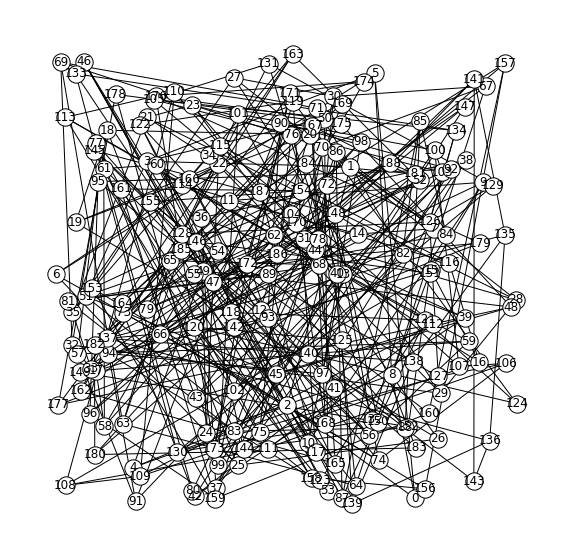

randomly color the graph: 


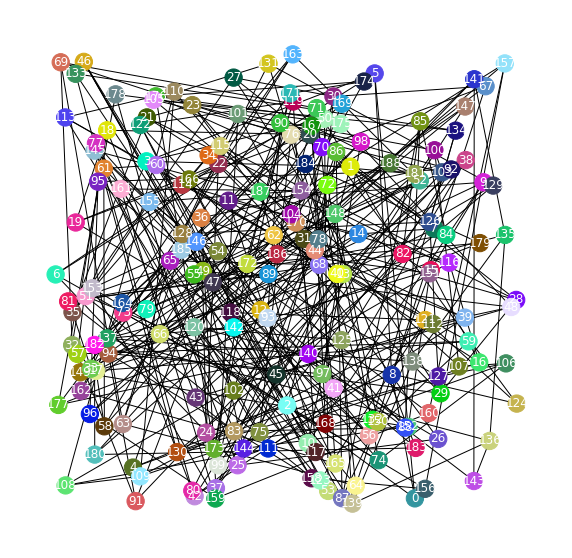

the feasible coloring is:
{0: '#77FEF5', 1: '#77FEF5', 2: '#33959F', 3: '#33959F', 4: '#77FEF5', 5: '#5547EB', 6: '#77FEF5', 7: '#33959F', 8: '#33959F', 9: '#33959F', 10: '#5547EB', 11: '#77FEF5', 12: '#33959F', 13: '#77FEF5', 14: '#5547EB', 15: '#77FEF5', 16: '#33959F', 17: '#33959F', 18: '#77FEF5', 19: '#33959F', 20: '#5547EB', 21: '#77FEF5', 22: '#5547EB', 23: '#33959F', 24: '#77FEF5', 25: '#33959F', 26: '#77FEF5', 27: '#77FEF5', 28: '#33959F', 29: '#5547EB', 30: '#33959F', 31: '#77FEF5', 32: '#33959F', 33: '#5547EB', 34: '#33959F', 35: '#7D544B', 36: '#33959F', 37: '#77FEF5', 38: '#5547EB', 39: '#77FEF5', 40: '#5547EB', 41: '#33959F', 42: '#7D544B', 43: '#33959F', 44: '#5547EB', 45: '#33959F', 46: '#77FEF5', 47: '#5547EB', 48: '#77FEF5', 49: '#5547EB', 50: '#77FEF5', 51: '#77FEF5', 52: '#33959F', 53: '#33959F', 54: '#33959F', 55: '#5547EB', 56: '#77FEF5', 57: '#77FEF5', 58: '#77FEF5', 59: '#5547EB', 60: '#77FEF5', 61: '#33959F', 62: '#33959F', 63: '#33959F', 64: '#77FEF5', 65: '#55

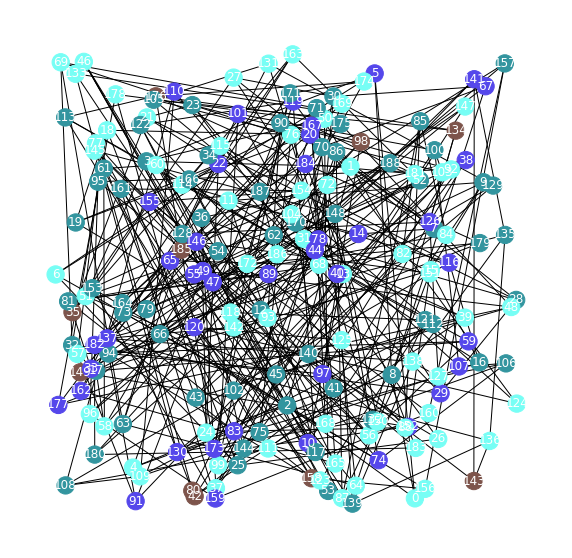

In [8]:
coloring_kempe, node_pos = graph_coloring_local(g, 10)

1
44
48
50
68
97
133
143
150
163
179
183
the feasible coloring is:
{0: '#7D544B', 1: '#77FEF5', 2: '#5547EB', 3: '#7D544B', 4: '#7D544B', 5: '#5547EB', 6: '#7D544B', 7: '#33959F', 8: '#33959F', 9: '#33959F', 10: '#5547EB', 11: '#7D544B', 12: '#33959F', 13: '#7D544B', 14: '#5547EB', 15: '#7D544B', 16: '#33959F', 17: '#33959F', 18: '#33959F', 19: '#7D544B', 20: '#5547EB', 21: '#33959F', 22: '#5547EB', 23: '#7D544B', 24: '#7D544B', 25: '#5547EB', 26: '#33959F', 27: '#33959F', 28: '#7D544B', 29: '#5547EB', 30: '#7D544B', 31: '#5547EB', 32: '#7D544B', 33: '#5547EB', 34: '#7D544B', 35: '#5547EB', 36: '#33959F', 37: '#7D544B', 38: '#5547EB', 39: '#5547EB', 40: '#5547EB', 41: '#33959F', 42: '#7D544B', 43: '#7D544B', 44: '#77FEF5', 45: '#7D544B', 46: '#33959F', 47: '#5547EB', 48: '#77FEF5', 49: '#5547EB', 50: '#77FEF5', 51: '#5547EB', 52: '#7D544B', 53: '#7D544B', 54: '#33959F', 55: '#5547EB', 56: '#7D544B', 57: '#7D544B', 58: '#7D544B', 59: '#5547EB', 60: '#7D544B', 61: '#33959F', 62: '#33959F

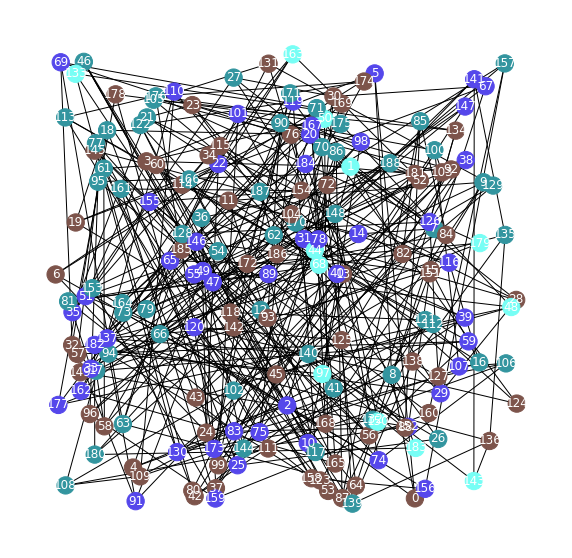

In [37]:
coloring_partial = partial_k_coloring(g, node_pos, coloring_kempe)

7
improvement 7
8
improvement 8
9
improvement 9
18
improvement 18
21
improvement 21
26
improvement 26
27
improvement 27
34
improvement 34
37
improvement 37
39
improvement 39
41
improvement 41
46
improvement 46
48
50
51
improvement 51
48
50
56
improvement 56
48
50
57
improvement 57
48
50
58
improvement 58
48
50
60
improvement 60
48
50
64
improvement 64
48
50
68
69
improvement 69
48
50
68
72
improvement 72
48
50
68
76
improvement 76
48
50
68
77
improvement 77
48
50
68
82
improvement 82
48
50
68
84
improvement 84
48
50
68
87
improvement 87
48
50
68
88
improvement 88
48
50
68
92
improvement 92
48
50
68
93
improvement 93
48
50
68
96
improvement 96
48
50
68
99
improvement 99
48
50
68
103
improvement 103
48
50
68
104
improvement 104
48
50
68
109
improvement 109
48
50
68
111
improvement 111
48
50
68
114
improvement 114
48
50
68
115
improvement 115
48
50
68
118
improvement 118
48
50
68
123
improvement 123
48
50
68
124
improvement 124
48
50
68
125
improvement 125
48
50
68
127
improvement 127
48


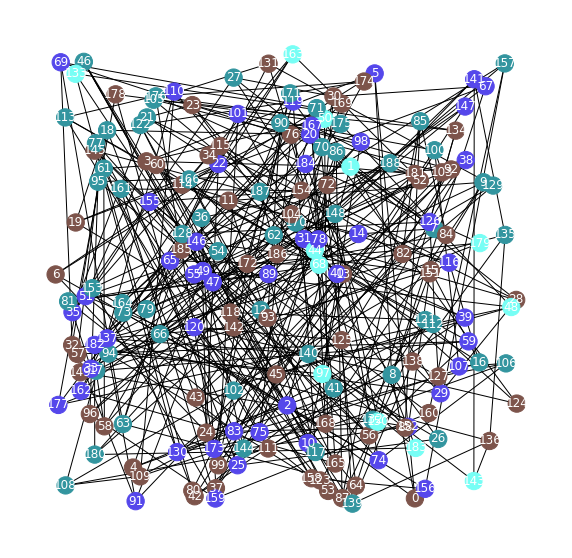

In [34]:
coloring_partial_2 = partial_k_coloring(g, node_pos, coloring_kempe, is_min_level=False)